In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import ast
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

Загрузка данных и обработка признаков

In [17]:
df = pd.read_csv('mvideo_features.csv')
df = df.drop_duplicates(subset=df.columns.difference(['product_id']), keep='first').reset_index(drop=True)


columns_needed = ['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза', 'Количество ядер', 'Технология экрана', 'Разрешение экрана', 'Экран',
                  "Степень защиты", "Разрешение видеосъемки", "Цифровой зум (x)", "Оперативная и встроенная память",
                  "Вес (г)", "Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)", "Мощность блока питания (Вт)", "Встроенная память (ROM) (ГБ)",
                  'Диагональ дополнительного экрана (")','Разрешение по горизонтали в развернутом виде (Пикс)',
                  "Разрешение по вертикали в развернутом виде (Пикс)",'Диагональ в развернутом виде (")', 'Цвет', 'Оптическая стабилизация','Оптический зум на увеличение (x)',
                  "Разрешение дополнительного экрана по вертикали (Пикс)","Разрешение дополнительного экрана по горизонтали (Пикс)",
                  'Поддержка быстрой зарядки', 'Емкость аккумулятора (мАч)', 'Поддержка беспроводной зарядки', 'brand', 'Встроенный искусственный интеллект',
                  'Гарантия предоставляется', 'Страна', 'Основная камера МПикс','Съемка видео в портретном режиме', 'Фронтальная камера МПикс',
                  'Количество основных камер (шт)', 'Состояние', 'Безрамочный', 'Материал корпуса']
target = ['salePrice']


df = df[columns_needed + target + ['product_id', 'name']]
df[["Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)"]].head(3)
def choose(row):
    if '0' in str(row['memory2']):
        return row['memory2']
    if '0' in str(row['memory3']):
        return row['memory3']
    return row['memory4']

def get_memory(x):
    if type(x) == float:
        return x
    if type(x) == str:
        f = re.findall(r'[0-9]+', x)
        if type(f[-1]) == str:
            return float(f[-1])
    return x
def get_memory_from_name(x):
    if 'TB' in x:
        f = re.findall(r'[0-9/]+TB', x)
        return get_memory(f[0]) * 1024.0 if len(f) > 0 else np.nan
    if 'GB' in x:
        f = re.findall(r'[0-9/]+GB', x)
        return get_memory(f[0]) if len(f) > 0 else np.nan
    return np.nan

df['memory2'] = df["Оперативная и встроенная память"].apply(lambda x: get_memory(x))
df['memory3'] = df["Встроенная память (ROM) (ГБ)"].apply(lambda x: get_memory(x))
df['memory4'] = df["name"].apply(lambda x: get_memory_from_name(x))
df['memory'] = df.apply(choose, axis=1)

df = df.drop(columns=["Оперативная и встроенная память", "Встроенная память (ROM) (ГБ)", 'memory2', 'memory3', 'memory4'])
def get_height(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[0]) == str:
            return float(f[0])
    return x

def get_width(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[1]) == str:
            return float(f[1])
    return x


def get_depth(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if len(f) < 3:
            return np.nan
        if type(f[2]) == str:
            return float(f[2])
    return np.nan

def choose_h(row):
    if row['height1'] !=  np.nan:
        return row['height1']
    return row['height2']
def choose_w(row):
    if row['width1'] !=  np.nan:
        return row['width1']
    return row['width2']
def choose_d(row):
    if row['depth1'] !=  np.nan:
        return row['depth1']
    return row['depth2']


df['height1'] = df["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_height(x))
df['width1'] = df["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_width(x))
df['depth1'] = df["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_depth(x))

df['height2'] = df["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_height(x))
df['width2'] = df["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_width(x))
df['depth2'] = df["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_depth(x))

df['height'] = df.apply(choose_h, axis=1)
df['width'] = df.apply(choose_w, axis=1)
df['depth'] = df.apply(choose_d, axis=1)

df = df.drop(columns=["Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)", 'height1', 'height2', 'width1', 'width2', 'depth1', 'depth2'])

def get_res_0(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[0]) == str:
            return float(f[0])
    return 720.0

def get_res_1(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[1]) == str:
            return float(f[1])
    return 720.0



df['video_resolution_v'] = df["Разрешение видеосъемки"].apply(lambda x: get_res_1(x))
df['video_resolution_h'] = df["Разрешение видеосъемки"].apply(lambda x: get_res_0(x))

df['screen_resolution_h'] = df["Разрешение экрана"].apply(lambda x: get_res_0(x))
df['screen_resolution_v'] = df["Разрешение экрана"].apply(lambda x: get_res_1(x))

df['screen_diag'] = df["Экран"].apply(lambda x: np.nan if get_res_0(x) > 9.0 else get_res_0(x))


df = df.drop(columns=["Разрешение видеосъемки", "Разрешение экрана", "Экран"])

def get_dust_IP(x):
    if type(x) is str and x[:2] == 'IP':
        if x[2] == 'X':
            return np.nan
        return int(x[2])
    return 0.0

def get_water_IP(x):
    if type(x) is str and  x[:2] == 'IP':
        if x[3] == 'X':
            return np.nan
        return int(x[3])
    return 0.0


df['dust_IP'] = df["Степень защиты"].apply(lambda x: get_dust_IP(x))
df['water_IP'] = df["Степень защиты"].apply(lambda x: get_water_IP(x))

df = df.drop(columns=["Степень защиты"])

df['zoom'] = df['Цифровой зум (x)']
df['weight'] = df['Вес (г)']
df['kernel_cnt'] = df['Количество ядер']
df['screen_technology'] = df['Технология экрана']
df['power'] = df['Мощность блока питания (Вт)']

metals = ['металл', 'титан', 'алюм', 'сталь']
df['frame_has_metal'] = df['Материал корпуса'].apply(lambda x: any(metal in x.lower() for metal in metals) if type(x) == str else False).astype('int')
df['frame_has_plastic'] = df['Материал корпуса'].apply(lambda x: 'пластик' in x.lower() if type(x) == str else False ).astype('int')

df = df.drop(columns=["Цифровой зум (x)", "Вес (г)", "Количество ядер", "Технология экрана", "Мощность блока питания (Вт)", "Материал корпуса"])

In [18]:
df['is_new'] = df['Состояние'].apply(lambda x: 0 if x == 'восстановленный' else 1)
df = df.drop(columns=['Состояние'])

iphone_battery_capacity = {
    'iPhone 16 Pro': 3355,
    'iPhone 16 Pro Max': 4676,
    'iPhone 16': 3561,
    'iPhone 16 Plus': 4006,
    'iPhone 15 Pro': 3274,
    'iPhone 15 Pro Max': 4422,
    'iPhone 15': 3349,
    'iPhone 15 Plus': 4383,
    'iPhone 14 Pro': 3200,
    'iPhone 14 Pro Max': 4323,
    'iPhone 14': 3279,
    'iPhone 14 Plus': 4325,
    'iPhone 13 Pro': 3095,
    'iPhone 13 Pro Max': 4352,
    'iPhone 13': 3227,
    'iPhone 13 mini': 2406,
    'iPhone SE (2022)': 2018,
    'iPhone SE (2020)': 1821,
    'iPhone 12 Pro': 2815,
    'iPhone 12 Pro Max': 3687,
    'iPhone 12': 2815,
    'iPhone 12 mini': 2227,
    'iPhone 11 Pro': 3046,
    'iPhone 11 Pro Max': 3969,
    'iPhone 11': 3110,
    'iPhone XR': 2942,
    'iPhone XS': 2658,
    'iPhone XS Max': 3174,
    'iPhone X': 2716,
    'iPhone 8 Plus': 2691,
    'iPhone 8': 1821
}

normalized_battery_capacity = {
    model.lower().replace('iphone ', '').strip(): capacity
    for model, capacity in iphone_battery_capacity.items()
}

def fill_iphone_capacity(row):
    if pd.isna(row['Емкость аккумулятора (мАч)']):
        series = str(row['Серия']).lower().replace('iphone', '').replace('apple', '').strip()
        return normalized_battery_capacity.get(series, row['Емкость аккумулятора (мАч)'])
    return row['Емкость аккумулятора (мАч)']

df['standarts'] = df['Поддержка стандартов'].apply(lambda x: re.split(r'[ /]', str(x)))
df['battery'] = df.apply(fill_iphone_capacity, axis=1)
mean_battery = df['Емкость аккумулятора (мАч)'].mean()

df['is_5G'] = df['standarts'].apply(lambda x: '5G' in x if isinstance(x, list) else False)
df['is_5G'] = df['is_5G'].astype(int)

df['frameless'] = (df['Безрамочный'] == 'Да').astype(int)


def get_year(x):
    if x >= 2022.0:
        return int(x)
    return 2022

df['year'] = np.where(df['Год релиза'] != 2028, df['Год релиза'], 2023)
df['year'] = df['year'].apply(lambda x: get_year(x))

df = df.rename(columns={'Количество основных камер (шт)' : 'main_cams'})

In [19]:
# Список столбцов, где нужно заменить NaN на 0
columns_to_fill = [
    'Оптический зум на увеличение (x)'
]

df[columns_to_fill] = df[columns_to_fill].fillna(0)
df[['Съемка видео в портретном режиме','Оптическая стабилизация']] = df[['Съемка видео в портретном режиме', 'Оптическая стабилизация']].fillna("Нет")

# Преобразуем в список чисел
def parse_camera(s):
    mp_values = []
    for x in str(s).split('/'):
        if x.strip() == '0':
            continue
        try:
            # Пробуем преобразовать в число
            mp_values.append(float(x))
        except ValueError:
            # Если не число (например, "TOF"), пропускаем или добавляем 0
            continue
    return mp_values

df['camera_mp_parsed'] = df['Основная камера МПикс'].apply(parse_camera)
df['front_camera'] = df['Фронтальная камера МПикс'].apply(parse_camera)


df['opt_zoom'] = df['Оптический зум на увеличение (x)']
df = df.drop(columns=['Основная камера МПикс', 'Фронтальная камера МПикс', 'Страна',
                           'Оптический зум на увеличение (x)', 'Гарантия предоставляется','Оптическая стабилизация', 'Съемка видео в портретном режиме', 'Емкость аккумулятора (мАч)'])
df['front_camera_mp_total'] = df['front_camera'].apply(lambda x: sum(x) if isinstance(x, list) else 0)
df['main_camera_mp_total'] = df['camera_mp_parsed'].apply(lambda x: sum(x) if isinstance(x, list) else 0)

df = df.drop(columns=['front_camera', 'camera_mp_parsed'])

In [20]:
df['brand_Apple'] = (df['brand'] == 'Apple').astype(int)
df['brand_Samsung'] = (df['brand'] == 'Samsung').astype(int)
df['brand_Xiaomi'] = (df['brand'] == 'Xiaomi').astype(int)
df['brand_Tecno'] = (df['brand'] == 'Tecno').astype(int)
df['brand_HONOR'] = (df['brand'] == 'HONOR').astype(int)
df['brand_HUAWEI'] = (df['brand'] == 'HUAWEI').astype(int)
df['brand_Infinix'] = (df['brand'] == 'Infinix').astype(int)
df['strong_frame'] = df['frame_has_metal'] - df['frame_has_plastic']
df = df.drop(columns=['frame_has_metal', 'frame_has_plastic'])

df = df.drop(columns=['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза',
       'Диагональ дополнительного экрана (")',
       'Разрешение по горизонтали в развернутом виде (Пикс)',
       'Разрешение по вертикали в развернутом виде (Пикс)',
       'Диагональ в развернутом виде (")', 'Цвет',
       'Разрешение дополнительного экрана по вертикали (Пикс)',
       'Разрешение дополнительного экрана по горизонтали (Пикс)',
       'Поддержка быстрой зарядки',
       'Поддержка беспроводной зарядки', 'brand',
       'Встроенный искусственный интеллект',
       'Безрамочный', 'product_id', 'name', 'kernel_cnt', 'screen_technology', 'standarts', 'power'])

Мини проверки после предобработки

In [21]:
import numpy as np
import pandas as pd

TARGET = "salePrice"
assert TARGET in df.columns
df[TARGET] = pd.to_numeric(df[TARGET], errors="coerce")
df = df.dropna(subset=[TARGET]).copy()
df = df[df[TARGET] > 0].copy()
X_raw = df.drop(columns=[TARGET])
non_numeric = X_raw.columns[X_raw.dtypes == "object"].tolist()
print("Object columns:", non_numeric)

Object columns: []


Трейн-тест сплит + лог таргет

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=[TARGET]).copy()
y = df[TARGET].astype(float).copy()
y_log = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.3, random_state=42
)

print(X_train.shape, X_test.shape)

(650, 30) (279, 30)


In [23]:
# Сколько пропусков в целом
nan_rate = X.isna().mean().sort_values(ascending=False)
print(nan_rate.head(15))

# Сколько строк имеют хотя бы один NaN
print("Rows with any NaN:", X.isna().any(axis=1).sum(), "out of", len(X))

zoom                     0.312164
depth                    0.286329
width                    0.285253
height                   0.285253
weight                   0.282024
screen_diag              0.032293
dust_IP                  0.026911
battery                  0.004306
main_camera_mp_total     0.002153
front_camera_mp_total    0.002153
screen_resolution_v      0.000000
video_resolution_v       0.000000
main_cams                0.000000
memory                   0.000000
water_IP                 0.000000
dtype: float64
Rows with any NaN: 570 out of 929


In [27]:
from interpret.glassbox import ExplainableBoostingRegressor

In [28]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

ebm_params = dict(
    random_state=42,
    max_bins=256,                 # меньше бинов = меньше риск переобучения
    learning_rate=0.03,           # поменьше для стабильности
    min_samples_leaf=10,          # регуляризация
    max_leaves=3,                 # простые формы
    interactions=10,               # контроль сложности
)

fold_metrics = []

for fold, (tr_idx, val_idx) in enumerate(cv.split(X_train)):
    X_tr, X_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]  # log1p

    ebm = ExplainableBoostingRegressor(**ebm_params)
    ebm.fit(X_tr, y_tr)

    pred_val_log = ebm.predict(X_val)
    y_true = np.expm1(y_val)
    y_pred = np.expm1(pred_val_log)

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)

    fold_metrics.append([rmse, mae, r2])
    print(f"Fold {fold:02d}: RMSE={rmse:,.0f} | MAE={mae:,.0f} | R2={r2:.4f}")

fold_metrics = np.array(fold_metrics)
print("\nEBM CV mean ± std:")
print(f"RMSE: {fold_metrics[:,0].mean():,.0f} ± {fold_metrics[:,0].std():,.0f}")
print(f"MAE : {fold_metrics[:,1].mean():,.0f} ± {fold_metrics[:,1].std():,.0f}")
print(f"R2  : {fold_metrics[:,2].mean():.4f} ± {fold_metrics[:,2].std():.4f}")

Fold 00: RMSE=19,492 | MAE=5,735 | R2=0.8616
Fold 01: RMSE=6,412 | MAE=3,612 | R2=0.9804
Fold 02: RMSE=22,313 | MAE=6,934 | R2=0.8179
Fold 03: RMSE=13,999 | MAE=5,854 | R2=0.9433
Fold 04: RMSE=12,154 | MAE=6,467 | R2=0.9292
Fold 05: RMSE=20,145 | MAE=5,645 | R2=0.8202
Fold 06: RMSE=10,612 | MAE=5,429 | R2=0.9619
Fold 07: RMSE=7,552 | MAE=4,289 | R2=0.9787
Fold 08: RMSE=12,853 | MAE=5,648 | R2=0.9268
Fold 09: RMSE=20,104 | MAE=6,133 | R2=0.8627
Fold 10: RMSE=12,105 | MAE=5,512 | R2=0.9438
Fold 11: RMSE=20,394 | MAE=5,854 | R2=0.8410
Fold 12: RMSE=21,468 | MAE=6,015 | R2=0.8597
Fold 13: RMSE=6,861 | MAE=4,234 | R2=0.9815
Fold 14: RMSE=10,783 | MAE=5,424 | R2=0.9454

EBM CV mean ± std:
RMSE: 14,483 ± 5,463
MAE : 5,519 ± 842
R2  : 0.9103 ± 0.0578


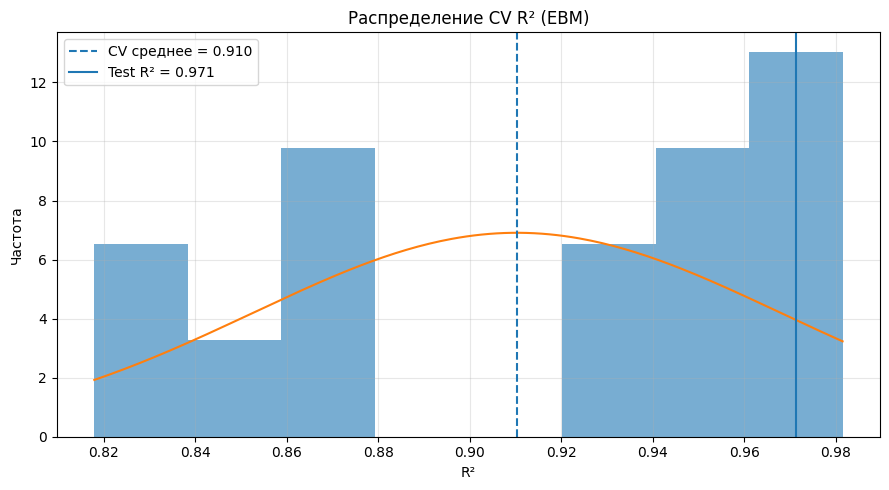

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

r2_scores = fold_metrics[:, 2]

mean_r2 = r2_scores.mean()
std_r2 = r2_scores.std()

plt.figure(figsize=(9, 5))

plt.hist(r2_scores, bins=8, density=True, alpha=0.6)
x = np.linspace(r2_scores.min(), r2_scores.max(), 200)
plt.plot(x, norm.pdf(x, mean_r2, std_r2))
plt.axvline(mean_r2, linestyle="--", label=f"CV среднее = {mean_r2:.3f}")
plt.axvline(r2, linestyle="-", label=f"Test R² = {r2:.3f}")

plt.xlabel("R²")
plt.ylabel("Частота")
plt.title("Распределение CV R² (EBM)")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [43]:
ebm_final = ExplainableBoostingRegressor(**ebm_params)
ebm_final.fit(X_train, y_train)

pred_test_log = ebm_final.predict(X_test)

y_true = np.expm1(y_test)
y_pred = np.expm1(pred_test_log)

In [44]:
rmse = np.sqrt(mean_squared_error(y_test, pred_test_log))
mae  = mean_absolute_error(y_test, pred_test_log)
r2   = r2_score(y_test, pred_test_log)

print(f"EBM TEST: RMSE={rmse:,.04f} | MAE={mae:,.04f} | R2={r2:.4f}")

EBM TEST: RMSE=0.1276 | MAE=0.0723 | R2=0.9786


In [45]:
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae  = mean_absolute_error(y_true, y_pred)
r2   = r2_score(y_true, y_pred)

print(f"EBM TEST: RMSE={rmse:,.0f} | MAE={mae:,.0f} | R2={r2:.4f}")

EBM TEST: RMSE=8,702 | MAE=3,943 | R2=0.9713


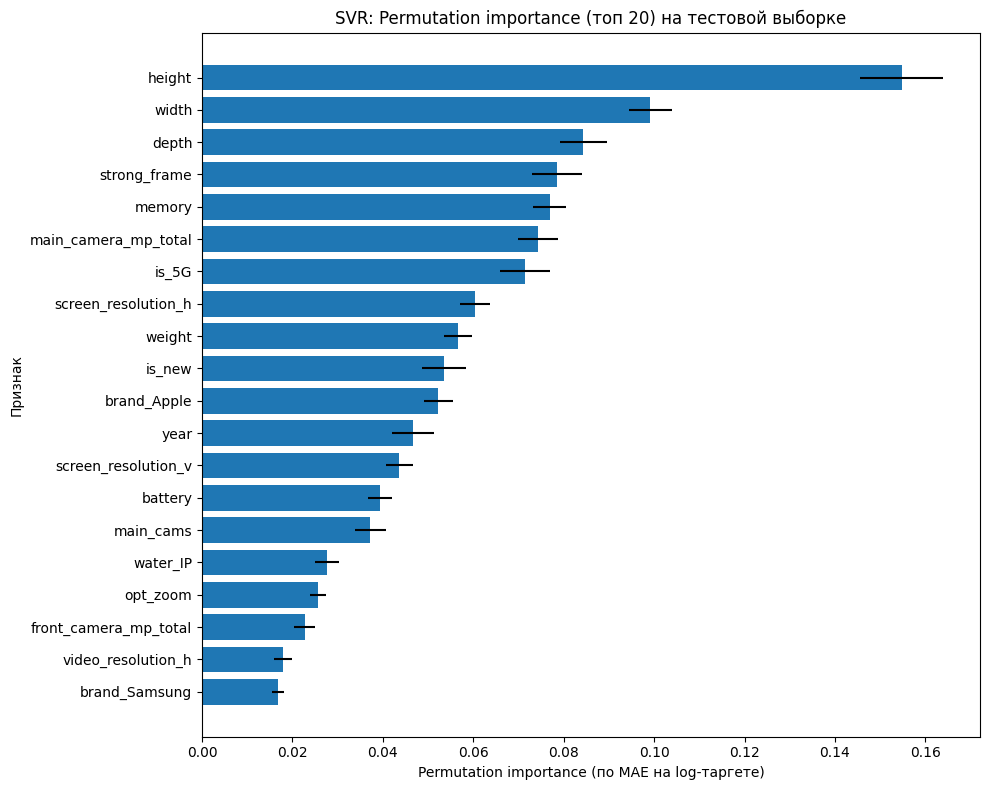

,feature,importance_mean,importance_std
2,height,0.154730,0.009161
3,width,0.099186,0.004795
4,depth,0.084303,0.005173
29,strong_frame,0.078610,0.005537
1,memory,0.076958,0.003652
21,main_camera_mp_total,0.074344,0.004375
16,is_5G,0.071448,0.005456
7,screen_resolution_h,0.060331,0.003333
13,weight,0.056687,0.003114
14,is_new,0.053533,0.004771


In [56]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

perm = permutation_importance(
    ebm_final,
    X_test,
    y_test,  # log target
    scoring="neg_mean_absolute_error",
    n_repeats=30,
    random_state=42,
    n_jobs=-1
)

imp_df_ebm = pd.DataFrame({
    "feature": X_test.columns,
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std
}).sort_values("importance_mean", ascending=False)

top_k = 20
plot_df = imp_df_ebm.head(top_k).iloc[::-1]

plt.figure(figsize=(10, 8))
plt.barh(plot_df["feature"], plot_df["importance_mean"], xerr=plot_df["importance_std"])
plt.xlabel("Permutation importance (по MAE на log-таргете)")
plt.ylabel("Признак")
plt.title(f"SVR: Permutation importance (топ {top_k}) на тестовой выборке")
plt.tight_layout()
plt.show()

imp_df_ebm.head(15)

Importance source: direct vector from exp.data()['scores']


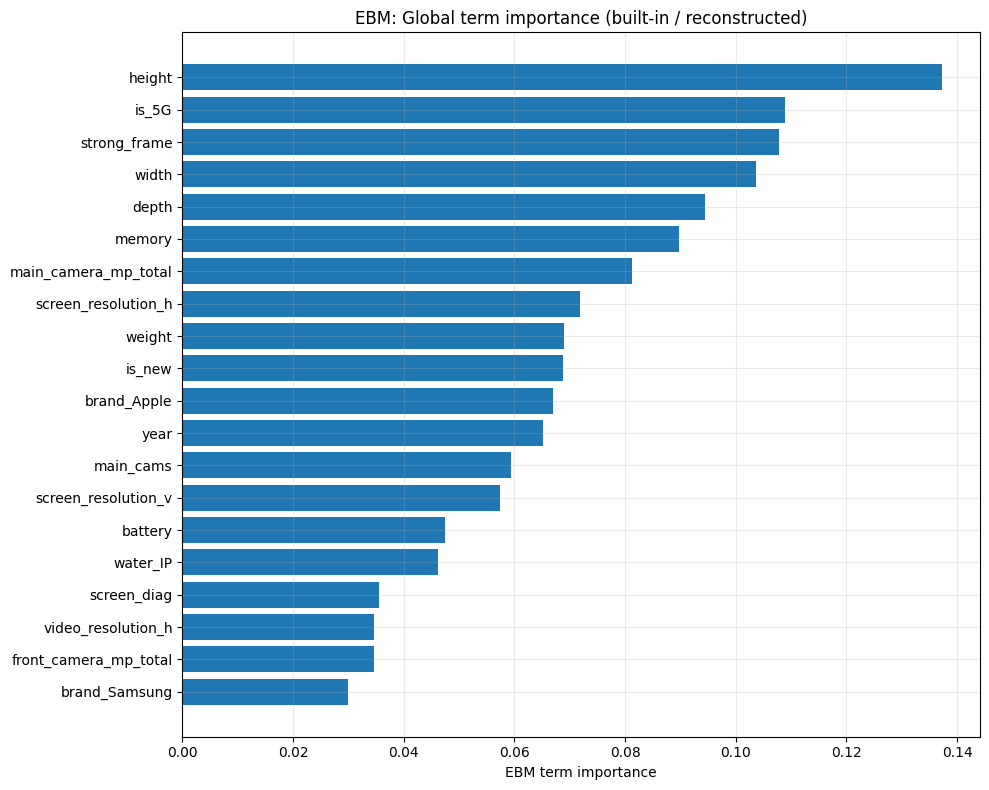

,term,importance
2,height,0.137276
16,is_5G,0.108875
29,strong_frame,0.107831
3,width,0.103635
4,depth,0.094505
1,memory,0.089691
21,main_camera_mp_total,0.081331
7,screen_resolution_h,0.071920
13,weight,0.068991
14,is_new,0.068838


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

exp = ebm_final.explain_global()
d = exp.data()

term_names = d["names"]
scores = d["scores"]

# fjfjfjf  тут от версии все зависит(((
is_vector_importance = False
try:
    arr = np.asarray(scores, dtype=float)
    # если это 1D массив длины = числу термов, значит это уже importance
    if arr.ndim == 1 and len(arr) == len(term_names):
        importances = arr
        is_vector_importance = True
    else:
        raise ValueError
except Exception:
    # иначе считаем importance как mean(|shape|) по каждому терму
    importances = []
    for s in scores:
        # s может быть списком/массивом значений функции терма
        s_arr = np.asarray(s, dtype=float)
        importances.append(np.mean(np.abs(s_arr)))
    importances = np.asarray(importances, dtype=float)

term_df = (pd.DataFrame({
    "term": term_names,
    "importance": importances
})
.sort_values("importance", ascending=False))

print("Importance source:", "direct vector from exp.data()['scores']" if is_vector_importance else "computed as mean(|shape score|)")

plt.figure(figsize=(10, 8))
plot_df = term_df.head(20).iloc[::-1]
plt.barh(plot_df["term"], plot_df["importance"])
plt.xlabel("EBM term importance")
plt.title("EBM: Global term importance (built-in / reconstructed)")
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

term_df.head(20)

In [48]:
import numpy as np
import pandas as pd

def ebm_local_explain_robust(ebm, X_row, X_ref, top_k=12):
    """
    X_row: pd.Series (одна строка)
    X_ref: pd.DataFrame (например, X_train) — нужен для baseline и fallback-оценок
    Возвращает: base_log, pred_log, df_local
    """
    X1 = X_row.to_frame().T

    # pred
    pred_log = float(ebm.predict(X1)[0])

    # baseline: среднее предсказание на X_ref (в лог-шкале)
    base_log = float(np.mean(ebm.predict(X_ref)))

    terms = list(getattr(ebm, "term_names_", X_ref.columns))
    n_terms = len(terms)

    # ---- Fast path: если есть predict_and_contrib ----
    if hasattr(ebm, "predict_and_contrib"):
        pred, contrib = ebm.predict_and_contrib(X1)
        contrib = np.asarray(contrib).reshape(-1)  # (n_terms,)
        df_local = (pd.DataFrame({"term": terms, "contribution": contrib})
                    .assign(abs_val=lambda d: np.abs(d["contribution"]))
                    .sort_values("abs_val", ascending=False)
                    .head(top_k)
                    .sort_values("contribution"))
        return base_log, pred_log, df_local

    # ---- Fallback: ablation по термам (медленнее, но железно) ----
    # Идея: "вклад терма" = (pred_full - pred_without_term)
    # Чтобы "выключить терм", используем внутренний метод ebm._predict(..., skip_terms=...)
    # Но его может не быть. Тогда делаем ещё более универсально:
    # оценим вклад терма через изменение предсказания при замене feature на типичное значение.
    contribs = []

    # типичные значения (медиана/мода) по X_ref
    typical = {}
    for col in X_ref.columns:
        if pd.api.types.is_numeric_dtype(X_ref[col]):
            typical[col] = float(X_ref[col].median())
        else:
            typical[col] = X_ref[col].mode().iloc[0]

    # Вклад терма приближенно через заморозку соответствующего признака:
    # если терм является "A" или "A & B"
    for term in terms:
        cols = [c.strip() for c in term.replace("&", " ").replace("x", " ").split()]
        cols = [c for c in cols if c in X_ref.columns]
        if len(cols) == 0:
            contribs.append(0.0)
            continue

        X_alt = X1.copy()
        for c in cols:
            X_alt[c] = typical[c]

        pred_alt = float(ebm.predict(X_alt)[0])
        contribs.append(pred_log - pred_alt)

    contribs = np.asarray(contribs)

    df_local = (pd.DataFrame({"term": terms, "contribution": contribs})
                .assign(abs_val=lambda d: np.abs(d["contribution"]))
                .sort_values("abs_val", ascending=False)
                .head(top_k)
                .sort_values("contribution"))

    return base_log, pred_log, df_local

In [49]:
test_prices = np.expm1(y_test)
cheap_idx = test_prices.idxmin()
mid_idx = (test_prices - test_prices.median()).abs().idxmin()
exp_idx = test_prices.idxmax()

for idx in [cheap_idx, mid_idx, exp_idx]:
    X_row = X_test.loc[idx]
    base_log, pred_log, df_loc = ebm_local_explain_robust(ebm_final, X_row, X_train, top_k=12)

    true_price = float(np.expm1(y_test.loc[idx]))
    pred_price = float(np.expm1(pred_log))

    print("\nINDEX:", idx)
    print(f"True={true_price:,.0f} | Pred={pred_price:,.0f} | AbsErr={abs(true_price-pred_price):,.0f}")
    display(df_loc)


INDEX: 66
True=5,999 | Pred=8,741 | AbsErr=2,742


,term,contribution,abs_val
32,memory & screen_resolution_h,-0.548441,0.548441
30,memory & height,-0.514385,0.514385
37,memory & main_camera_mp_total,-0.462254,0.462254
1,memory,-0.441762,0.441762
35,memory & year,-0.441762,0.441762
36,memory & opt_zoom,-0.441762,0.441762
34,memory & is_new,-0.441762,0.441762
33,memory & weight,-0.434260,0.434260
31,memory & depth,-0.343399,0.343399
16,is_5G,-0.257706,0.257706



INDEX: 817
True=46,990 | Pred=45,468 | AbsErr=1,522


,term,contribution,abs_val
20,front_camera_mp_total,-0.091134,0.091134
11,water_IP,-0.086924,0.086924
9,screen_diag,-0.080737,0.080737
3,width,-0.075684,0.075684
31,memory & depth,-0.045349,0.045349
38,depth & is_5G,-0.045349,0.045349
2,height,0.055196,0.055196
30,memory & height,0.055196,0.055196
29,strong_frame,0.073332,0.073332
23,brand_Samsung,0.096557,0.096557



INDEX: 478
True=299,999 | Pred=220,931 | AbsErr=79,068


,term,contribution,abs_val
2,height,0.325815,0.325815
19,opt_zoom,0.352774,0.352774
37,memory & main_camera_mp_total,0.377844,0.377844
1,memory,0.381974,0.381974
34,memory & is_new,0.381974,0.381974
32,memory & screen_resolution_h,0.399182,0.399182
35,memory & year,0.423451,0.423451
39,battery & opt_zoom,0.576982,0.576982
33,memory & weight,0.606350,0.606350
36,memory & opt_zoom,0.669655,0.669655


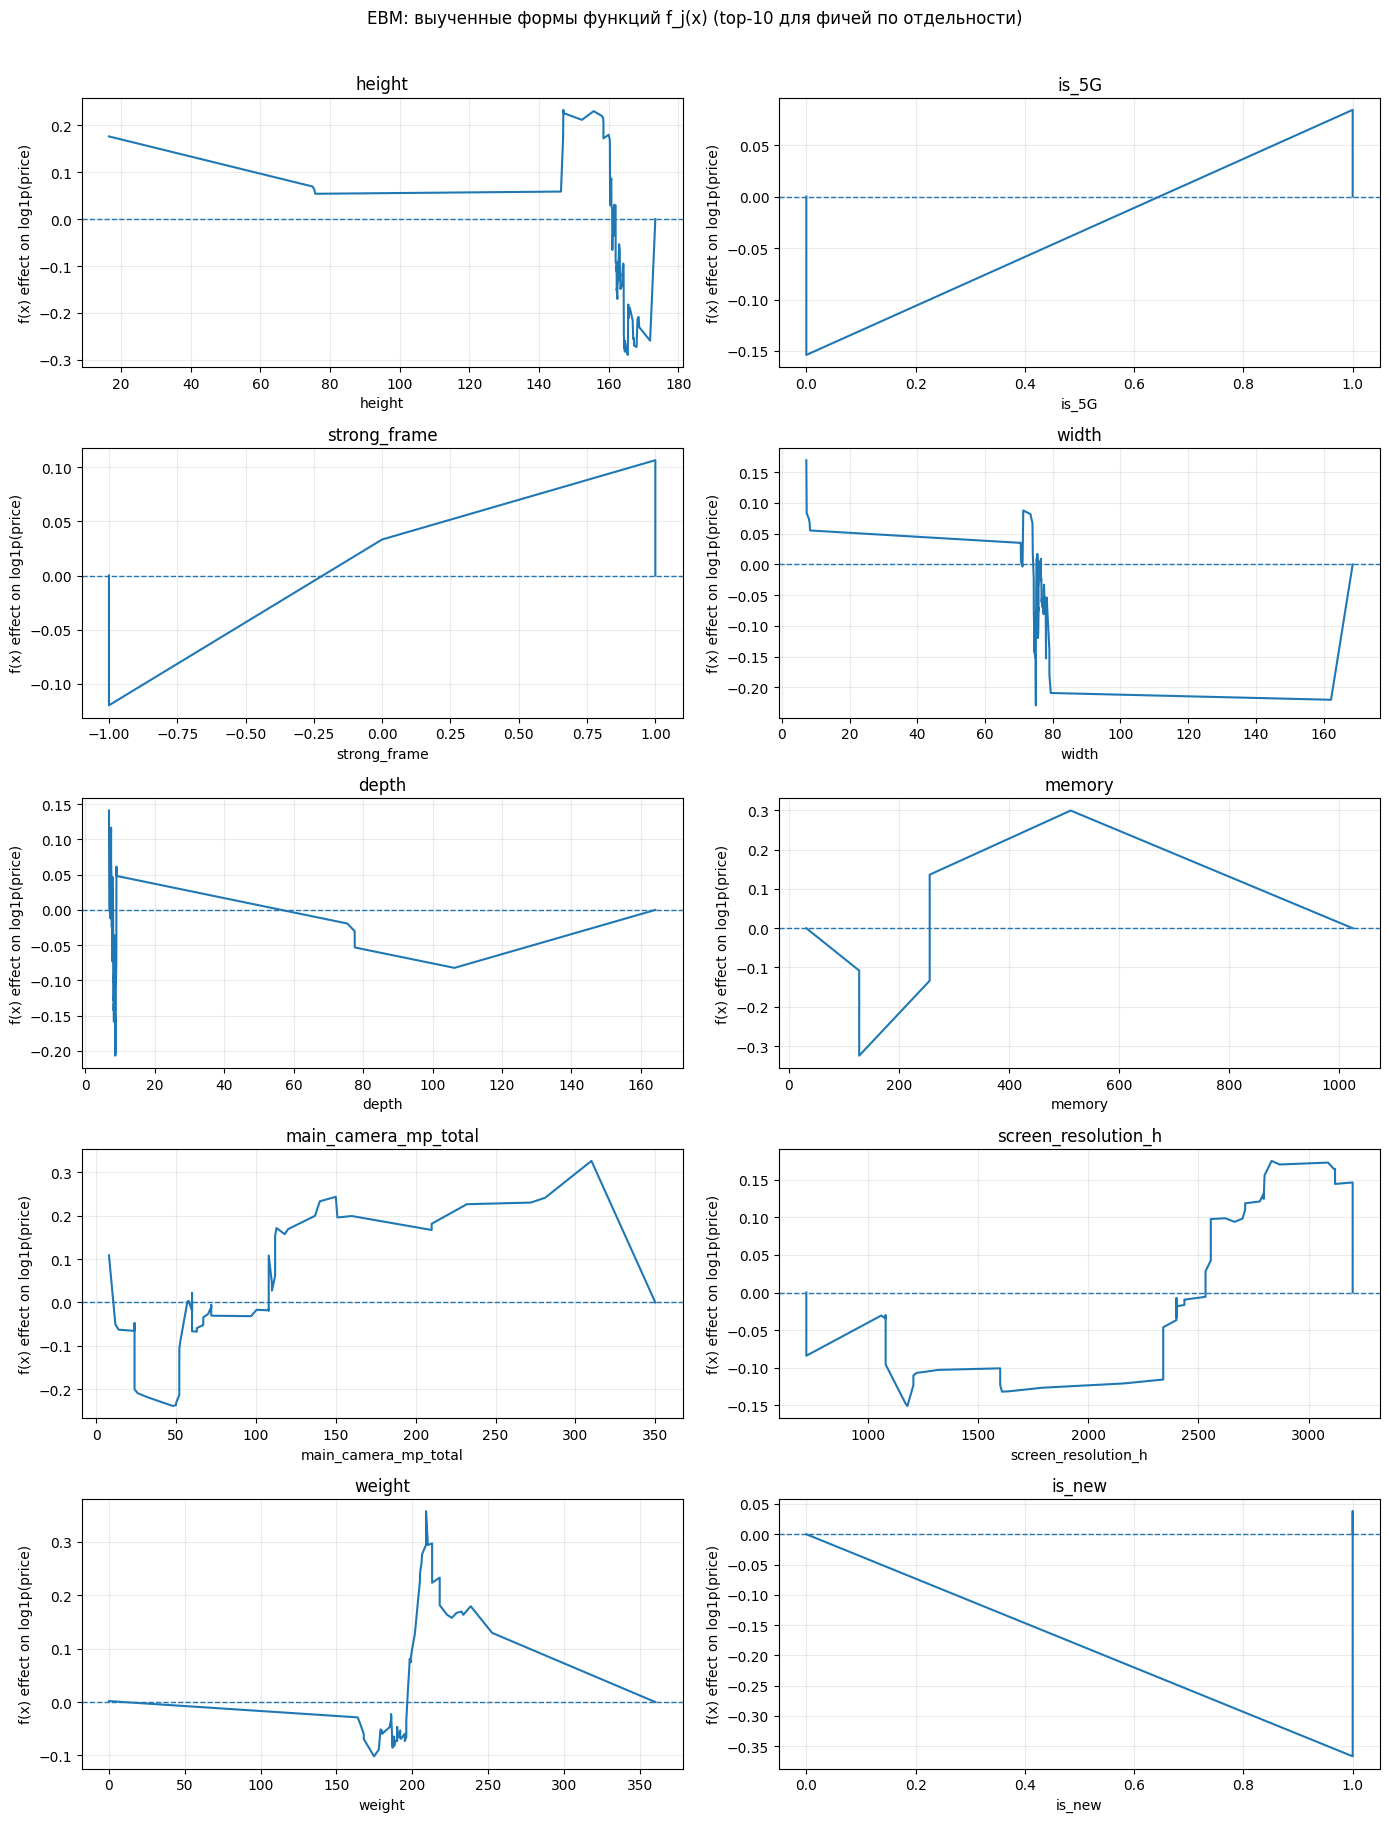

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def _safe_1d(x):
    arr = np.asarray(x)
    return arr.reshape(-1)

def plot_ebm_shape_terms(ebm, X_ref, term_df, top_k=10, ncols=2, figsize=(14, 18), drop_interactions=True):
    if not hasattr(ebm, "term_scores_") or not hasattr(ebm, "term_features_"):
        raise AttributeError("В этой версии EBM нет term_scores_ / term_features_. Тогда остаётся только dashboard show().")

    term_names = list(getattr(ebm, "term_names_", X_ref.columns))
    term_scores = ebm.term_scores_
    term_features = ebm.term_features_  # list of tuples with feature indices

    # выберем топ однофакторных термов
    selected = []
    for t in term_df["term"].tolist():
        if drop_interactions and ((" & " in t) or (" x " in t) or ("*" in t)):
            continue
        if t in term_names:
            j = term_names.index(t)
            # только однофакторные
            if isinstance(term_features[j], (list, tuple)) and len(term_features[j]) == 1:
                selected.append(j)
        if len(selected) >= top_k:
            break

    if len(selected) == 0:
        raise ValueError("Не нашлось однофакторных термов в топе. Поставь drop_interactions=False или увеличь top_k.")

    nrows = int(np.ceil(len(selected) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = np.array(axes).reshape(-1)

    for ax_i, j in enumerate(selected):
        ax = axes[ax_i]
        feat_idx = term_features[j][0]
        feat_name = X_ref.columns[feat_idx] if hasattr(X_ref, "columns") else term_names[j]
        y = _safe_1d(term_scores[j])

        # ось X: пытаемся взять биннинг из модели (если он есть)
        x = None
        if hasattr(ebm, "bins_"):
            try:
                # bins_ обычно хранит границы/категории по каждой фиче
                b = ebm.bins_[feat_idx]
                # continuous: b может быть array of edges/centers
                b_arr = np.asarray(b)
                if b_arr.ndim == 1 and len(b_arr) > 1:
                    # если это edges длиной len(y)+1 → возьмём центры
                    if len(b_arr) == len(y) + 1:
                        x = (b_arr[:-1] + b_arr[1:]) / 2
                    else:
                        # иначе просто подрежем/растянем к y
                        x = np.interp(np.linspace(0, 1, len(y)), np.linspace(0, 1, len(b_arr)), b_arr)
            except Exception:
                x = None

        # fallback: квантильная сетка по данным
        if x is None:
            s = X_ref.iloc[:, feat_idx].dropna()
            qs = np.linspace(0, 1, len(y))
            x = s.quantile(qs).values

        ax.plot(x, y)
        ax.axhline(0, linestyle="--", linewidth=1)
        ax.set_title(term_names[j])
        ax.set_xlabel(feat_name)
        ax.set_ylabel("f(x) эффект на логарифм цены log1p(price)")
        ax.grid(alpha=0.25)

    for k in range(len(selected), len(axes)):
        axes[k].axis("off")

    plt.suptitle(f"EBM: выученные формы функций f_j(x) (top-{len(selected)} для фичей по отдельности)", y=1.01)
    plt.tight_layout()
    plt.show()


# запуск
plot_ebm_shape_terms(ebm_final, X_train, term_df, top_k=10, ncols=2, figsize=(14, 18), drop_interactions=True)

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def _as_1d(arr):
    a = np.asarray(arr)
    if a.ndim == 0:
        return np.array([float(a)])
    return a.reshape(-1)

def _axis_from_bins_or_quantiles(ebm, X_ref, feat_idx, n_points):
    # 1) bins_
    if hasattr(ebm, "bins_"):
        try:
            b = np.asarray(ebm.bins_[feat_idx])
            # если edges длиной n_points+1 -> центры
            if b.ndim == 1 and len(b) == n_points + 1:
                return (b[:-1] + b[1:]) / 2
            # если уже центры/значения длиной n_points
            if b.ndim == 1 and len(b) == n_points:
                return b
            # если длина другая — интерполируем
            if b.ndim == 1 and len(b) > 1:
                x_old = np.linspace(0, 1, len(b))
                x_new = np.linspace(0, 1, n_points)
                return np.interp(x_new, x_old, b)
        except Exception:
            pass

    # 2) fallback: quantiles
    s = X_ref.iloc[:, feat_idx].dropna()
    if len(s) == 0:
        return np.arange(n_points)

    qs = np.linspace(0, 1, n_points)
    return s.quantile(qs).values

def plot_ebm_interactions_grid(
    ebm,
    X_ref,
    top_k=6,
    ncols=2,
    figsize=(14, 12),
    exclude_features=None
):
    """
    Рисует топ-K взаимодействий (2D термы) в виде heatmap сеткой.
    Importance proxy = mean(abs(term_scores_)) для матрицы.
    """
    if exclude_features is None:
        exclude_features = set()
    else:
        exclude_features = set(exclude_features)

    if not hasattr(ebm, "term_scores_") or not hasattr(ebm, "term_features_"):
        raise AttributeError("В этой версии EBM нет term_scores_/term_features_. Тогда остаётся show(ebm.explain_global()).")

    term_names = list(getattr(ebm, "term_names_", []))
    term_scores = ebm.term_scores_
    term_features = ebm.term_features_

    # соберём все 2D термы
    candidates = []
    for j, feats in enumerate(term_features):
        if not isinstance(feats, (tuple, list)) or len(feats) != 2:
            continue

        f1, f2 = feats
        name1 = X_ref.columns[f1]
        name2 = X_ref.columns[f2]
        if name1 in exclude_features or name2 in exclude_features:
            continue

        Z = np.asarray(term_scores[j])
        if Z.ndim != 2:
            continue

        imp = float(np.mean(np.abs(Z)))  # proxy importance
        term_name = term_names[j] if j < len(term_names) else f"{name1} & {name2}"
        candidates.append((imp, j, f1, f2, term_name))

    if len(candidates) == 0:
        raise ValueError("Не нашлось 2D термов (interactions). Возможно, interactions=0 или модель обучена без взаимодействий.")

    # сортируем по proxy-важности
    candidates.sort(reverse=True, key=lambda x: x[0])
    selected = candidates[:top_k]

    nrows = int(np.ceil(len(selected) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = np.array(axes).reshape(-1)

    for ax_i, (imp, j, f1, f2, term_name) in enumerate(selected):
        ax = axes[ax_i]
        Z = np.asarray(term_scores[j], dtype=float)

        # оси (центры бинов или квантильные сетки)
        x = _axis_from_bins_or_quantiles(ebm, X_ref, f2, Z.shape[1])  # по колонкам матрицы
        y = _axis_from_bins_or_quantiles(ebm, X_ref, f1, Z.shape[0])  # по строкам матрицы

        # heatmap
        im = ax.imshow(
            Z,
            aspect="auto",
            origin="lower",
            interpolation="nearest"
        )

        ax.set_title(f"{term_name}\nproxy importance={imp:.3f}", fontsize=10)
        ax.set_xlabel(X_ref.columns[f2])
        ax.set_ylabel(X_ref.columns[f1])

        # чтобы подписи не превращались в кашу — ставим мало тиков
        def _set_sparse_ticks(axis_vals, axis="x", max_ticks=6):
            n = len(axis_vals)
            if n <= max_ticks:
                idx = np.arange(n)
            else:
                idx = np.linspace(0, n - 1, max_ticks).astype(int)
            labels = [f"{axis_vals[i]:.0f}" if isinstance(axis_vals[i], (int, float, np.number)) else str(axis_vals[i]) for i in idx]
            if axis == "x":
                ax.set_xticks(idx)
                ax.set_xticklabels(labels, rotation=0)
            else:
                ax.set_yticks(idx)
                ax.set_yticklabels(labels)

        _set_sparse_ticks(x, "x", max_ticks=6)
        _set_sparse_ticks(y, "y", max_ticks=6)

        # colorbar для каждого графика (красиво, но не тяжело)
        cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        cbar.ax.set_ylabel("Effect on log1p(price)", rotation=90)

    # выключаем пустые оси
    for k in range(len(selected), len(axes)):
        axes[k].axis("off")

    plt.suptitle(f"EBM: Top-{len(selected)} interaction terms (2D heatmaps)", y=1.02)
    plt.tight_layout()
    plt.show()

    return selected

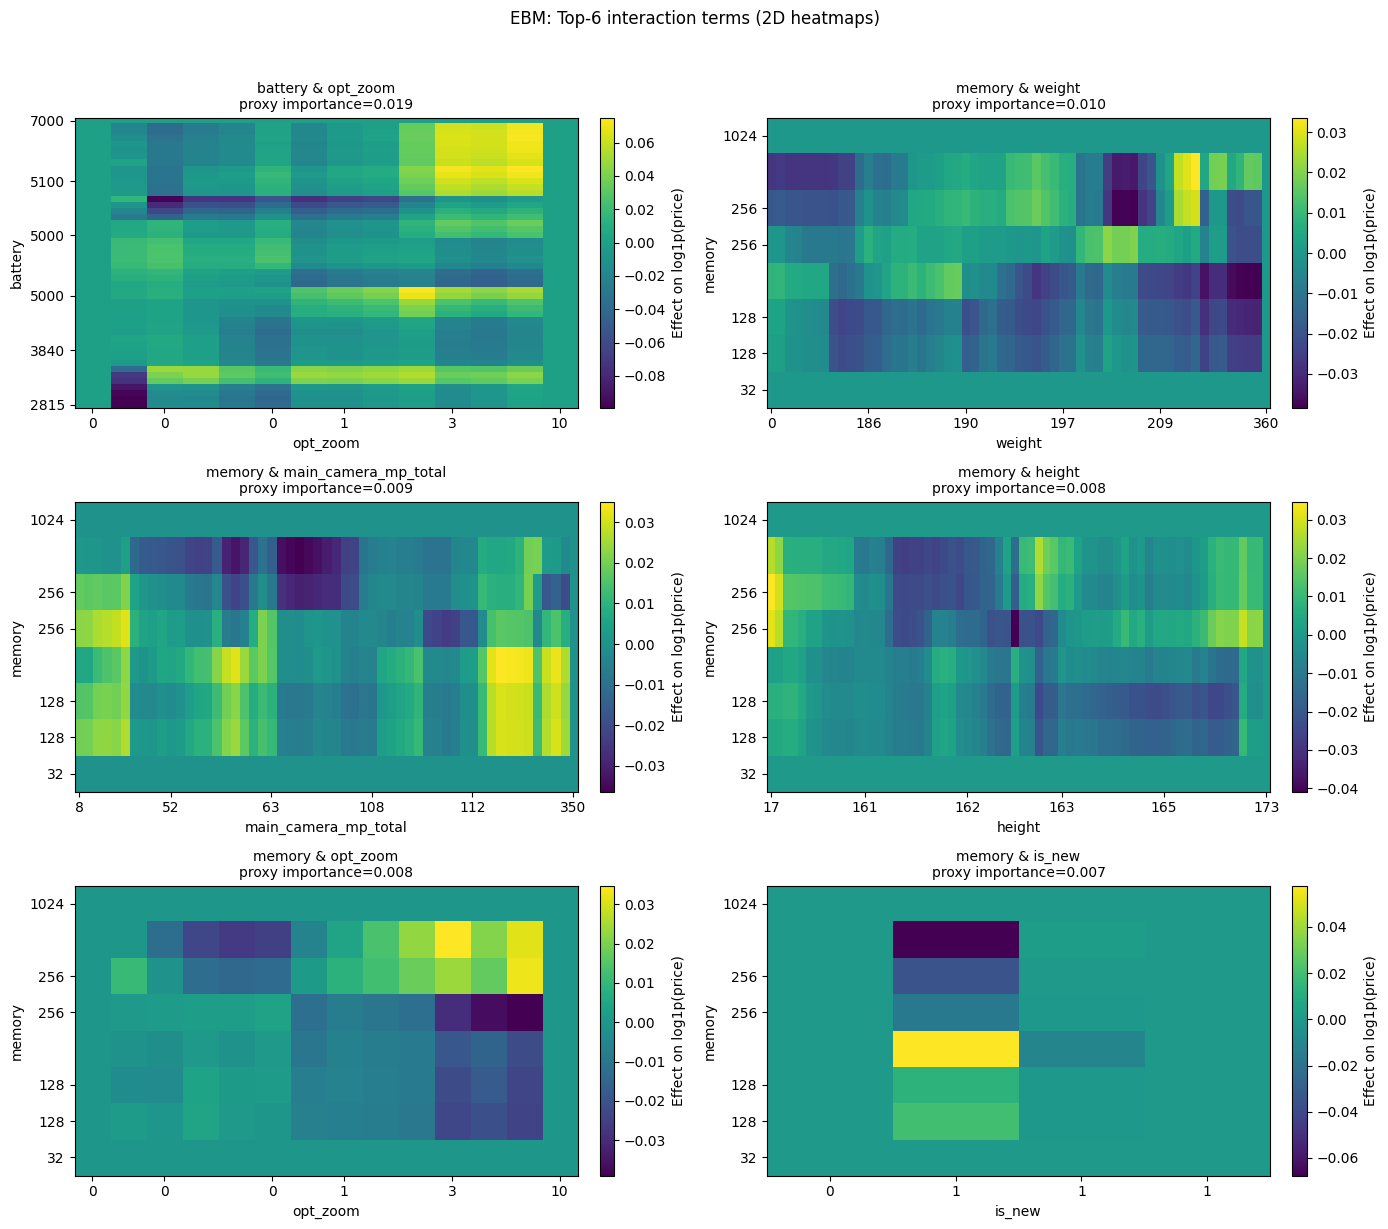

In [52]:
selected_interactions = plot_ebm_interactions_grid(
    ebm=ebm_final,
    X_ref=X_train,
    top_k=6,
    ncols=2,
    figsize=(14, 12)
)

PermutationExplainer explainer: 280it [00:10,  2.03s/it]


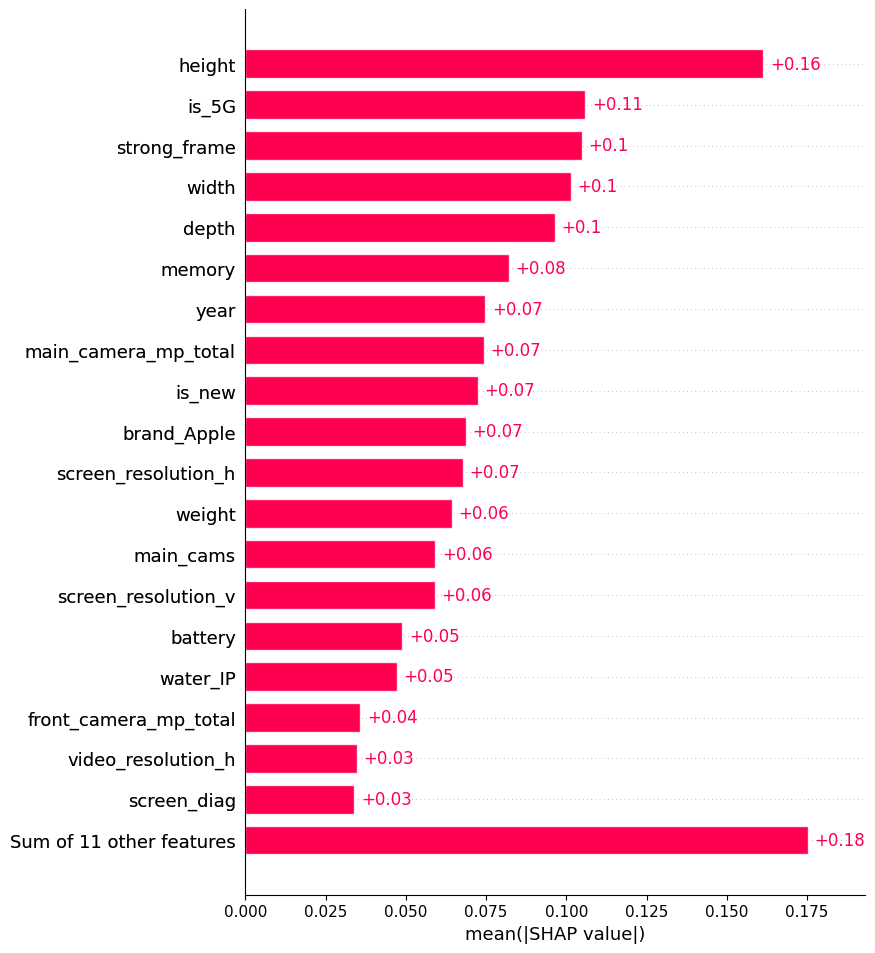

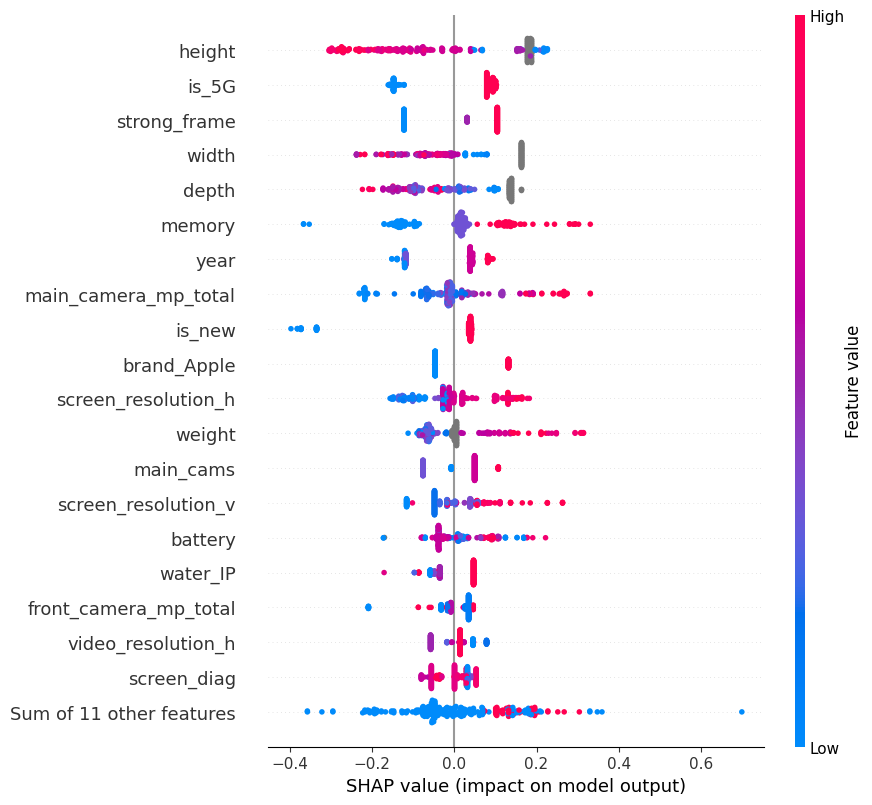

In [53]:
import shap
import numpy as np
import matplotlib.pyplot as plt

masker = shap.maskers.Independent(X_train)  # baseline распределение фич
explainer = shap.Explainer(
    ebm_final.predict,
    masker,
    algorithm="permutation"  # model-agnostic
)

shap_values = explainer(X_test, max_evals=300)
shap.plots.bar(shap_values, max_display=20)
shap.plots.beeswarm(shap_values, max_display=20)


INDEX: 66
True=5,999 | Pred=8,741 | AbsErr=2,742


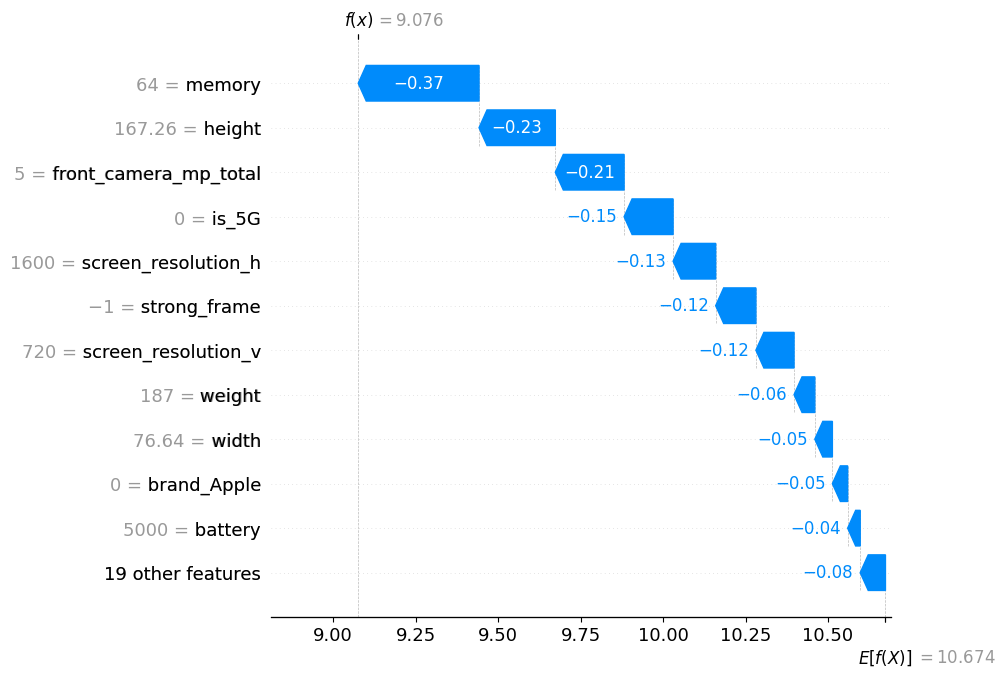


INDEX: 817
True=46,990 | Pred=45,468 | AbsErr=1,522


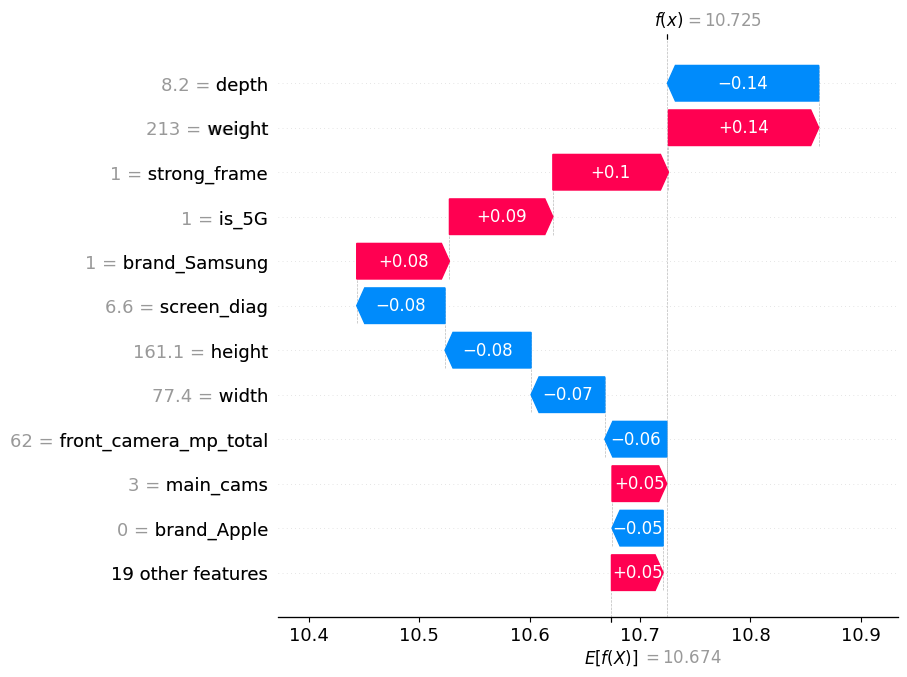


INDEX: 478
True=299,999 | Pred=220,931 | AbsErr=79,068


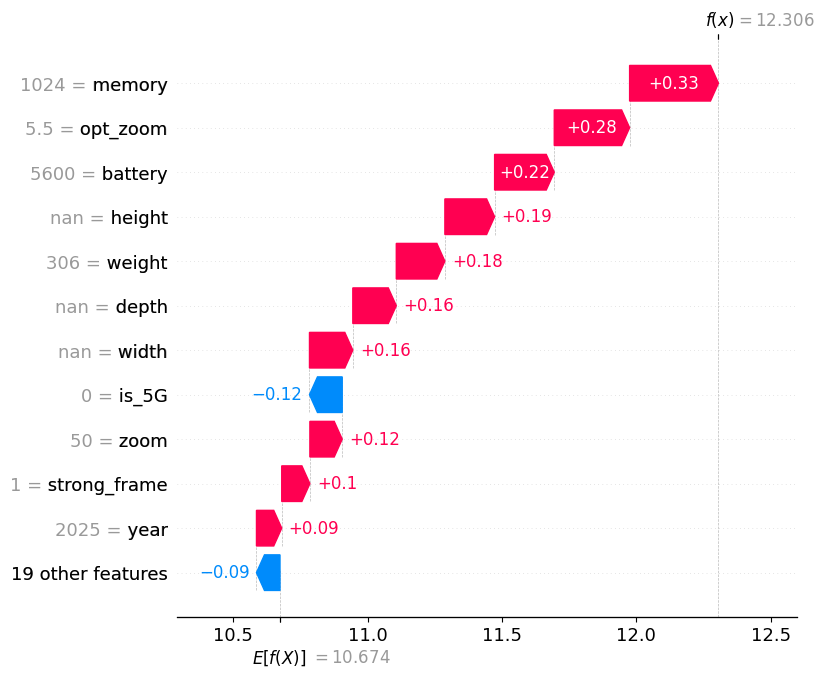

In [54]:
import shap
import numpy as np

test_prices = np.expm1(y_test)

cheap_idx = test_prices.idxmin()
mid_idx   = (test_prices - test_prices.median()).abs().idxmin()
exp_idx   = test_prices.idxmax()

for idx in [cheap_idx, mid_idx, exp_idx]:
    print("\nINDEX:", idx)
    row_pos = X_test.index.get_loc(idx)

    true_price = float(np.expm1(y_test.loc[idx]))
    pred_log = float(ebm_final.predict(X_test.loc[[idx]])[0])
    pred_price = float(np.expm1(pred_log))

    print(f"True={true_price:,.0f} | Pred={pred_price:,.0f} | AbsErr={abs(true_price-pred_price):,.0f}")

    # Waterfall (топ факторов)
    shap.plots.waterfall(shap_values[row_pos], max_display=12)